La posicion X del tesoro: 
0
La posicion Y del tesoro: 
0
La posicion X del agente: 
9
La posicion Y del agente: 
9
Qué tanta mala suerte tiene?
300
un error del: 
1
Se mueve: 
6
maximo cuantos movimientos?
300


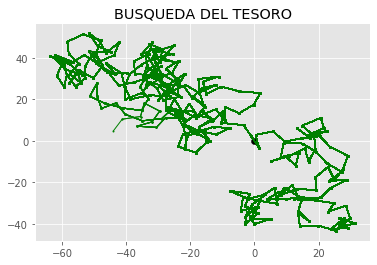

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


class Objective():
    def __init__(self, posX, posY):
        self.posX = posX
        self.posY = posY
    def getPos(self):
        return self.posX, self.posY

class Agent():
    def __init__(self, posX, posY):
        self.posX = posX
        self.posY = posY
    def moveAgent(self, newX, newY):
        self.posX = newX
        self.posY = newY
    def getPos(self):
        return self.posX, self.posY
    
def moveInSpaceNormal(epsilon, normalTolerance):
    #The "normal" is move 1 
    return np.random.normal(loc = epsilon, scale = normalTolerance, size = 1)



def searchTreasure(agent, treasure, epsilon, dummyness, movimiento):
    #what is the tolerance arround the perfect direction IN RADIANS
    level_dummyness = dummyness    

    sePuede = False
    #count = 0
    #while(True):
        #Break on more than 700 iterations
        #if(sePuede or count > 10000):
          #break
        #count+=1
        
        #for i in range (len(agents)):
    deltaX = agent.posX - tesoro.posX
    deltaY = agent.posY - tesoro.posY

    if(abs(deltaX) < epsilon and abs(deltaY) < epsilon):
        return True


    if deltaX != 0:
        idealDirection = math.atan(deltaY/deltaX)
        ndir = np.random.normal(loc = idealDirection, scale = level_dummyness, size = 1)
    else:
        #if i am just avobe of the treasure
        ndir = math.pi/2

    #if i am in the opposite Quadrant    
    if(tesoro.posX < agent.posX ): 
        ndir += math.pi
    if(tesoro.posX == agent.posX):
        if(tesoro.posY < agent.posY):
          ndir += math.pi

    #optinal moveTolerance
    moveTolerance = 0.5
    moves = moveInSpaceNormal(movimiento, moveTolerance)
    newX = agent.posX
    newY = agent.posY

    newX += moves*math.cos(ndir)
    newY += moves*math.sin(ndir)

    agent.moveAgent(newX, newY)

        #for i in range (len(agents)):
          #print(agents[i].getPos())
          #im.scatter(agents[i].posX, agents[i].posY, c = 'green')

    return sePuede
    print("I can get the point: " + str(sePuede))
numAgents = 1
print("La posicion X del tesoro: ")
tesoroX = float(input())
print("La posicion Y del tesoro: ")
tesoroY = float(input())
tesoro = Objective(tesoroX, tesoroY)

print("La posicion X del agente: ")
iniX = float(input())
print("La posicion Y del agente: ")
iniY = float(input())
agentes = []
for i in range (numAgents):
    agentes.append(Agent(iniX, iniY))
    #print(agentes[i].getPos())

#Nivel de mala suerte no ineptitud para el trabajo de buscador de tesoros
print("Qué tanta mala suerte tiene?")
razon = float(input())
level_dummyness = razon*math.pi/360.0

fig, im = plt.subplots()
#plt.axis([-100, 5, 0, 5])
x_data = []
y_data = []
#line, = plt.plot(x_data, y_data, marker = 'o')
puedo = False
#plt.style.use('fivethirtyeight')

print("un error del: ")
epsilon = float(input())

print("Se mueve: ")
movimiento = float(input())
plt.style.use('ggplot')
def animate(i):
  #for j in range numAgents:

  iCan = searchTreasure(agentes[0], tesoro, epsilon, level_dummyness, movimiento)
  
  if not iCan:
    x_data.append(float(agentes[0].posX))
    y_data.append(float(agentes[0].posY))
  #print(x_data, y_data)
  #line.set_data(x_data, y_data)
  name = "agente " + str(0)
  #line, = plt.plot(x_data, y_data, color='green', marker='o', markersize=6, linestyle = '-',linewidth=5) 
  #plt.legend()
  return plt.plot(x_data, y_data, color='green', marker='o', markersize=1, linestyle = '-',linewidth=1)
im.scatter(tesoro.posX, tesoro.posY, c = 'black')
plt.title("BUSQUEDA DEL TESORO")
#plt.legend()
print("maximo cuantos movimientos?")
maxMoves = int(input())
animation = FuncAnimation(fig, func = animate, frames = range(maxMoves), interval = 100)

#plt.plot(x_data, y_data, color='green', marker='o', markersize=1, linestyle = '-',linewidth=.5),
#plt.show()
HTML(animation.to_jshtml())
#print(x_data[-1], y_data[-1])

